In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2023/train_data.csv
/kaggle/input/widsdatathon2023/test_data.csv
/kaggle/input/widsdatathon2023/sample_solution.csv


In [2]:
# data analysis and wrangling
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf

#Statstical and ML packages
import scipy.stats as st
import statistics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller
import math

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [3]:
train_data = pd.read_csv("/kaggle/input/widsdatathon2023/train_data.csv") 

In [4]:
train_data.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,359800.000000,375734.000000,375734.000000,375734.000000,...,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000,375734.000000
mean,187866.500000,0.592766,0.517964,276.744064,10.801682,12.726739,10.099323,11.638229,10.733886,11.772646,...,-1.209959,-8.109918,6.800684,19.251970,-17.697565,-9.846867,-6.231860,16.014364,10.489945,11.296334
std,108465.207359,0.251744,0.272059,198.085182,10.952417,11.073553,10.339626,10.574276,9.403434,10.689967,...,37.317333,36.201507,38.458878,25.288526,31.946748,34.164678,27.050356,25.847455,25.070435,25.113214
min,0.000000,0.000000,0.000000,-2.310000,-14.960000,-14.970000,-11.720000,-17.560000,-13.720000,-13.330000,...,-94.570000,-89.940000,-64.870000,-39.280000,-100.560000,-106.080000,-93.980000,-52.610000,-66.110000,-57.610000
25%,93933.250000,0.409091,0.300000,104.062500,1.550000,3.650000,1.640000,3.080000,3.390000,2.970000,...,-27.200000,-33.350000,-19.650000,1.960000,-40.030000,-32.170000,-20.170000,-0.360000,-6.790000,-5.570000
50%,187866.500000,0.590909,0.533333,250.320000,9.950000,11.890000,9.490000,11.600000,10.890000,11.280000,...,-3.200000,-9.390000,2.330000,20.050000,-16.710000,-8.560000,-6.030000,18.650000,11.860000,11.650000
75%,281799.750000,0.818182,0.766667,420.010000,20.230000,22.110000,18.740000,20.360000,18.330000,20.300000,...,24.940000,17.960000,28.660000,35.090000,4.390000,10.500000,11.630000,31.210000,29.040000,29.180000
max,375733.000000,1.000000,1.000000,1185.140000,36.080000,36.030000,33.390000,34.640000,35.750000,38.350000,...,113.920000,96.550000,106.420000,91.760000,56.550000,83.890000,64.850000,90.390000,76.890000,88.660000


In [5]:
train_data.shape

(375734, 246)

In [6]:
train_data.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [7]:
train_data.dtypes

index                                   int64
lat                                   float64
lon                                   float64
startdate                              object
contest-pevpr-sfc-gauss-14d__pevpr    float64
                                       ...   
wind-vwnd-925-2010-16                 float64
wind-vwnd-925-2010-17                 float64
wind-vwnd-925-2010-18                 float64
wind-vwnd-925-2010-19                 float64
wind-vwnd-925-2010-20                 float64
Length: 246, dtype: object

In [8]:
train_data.isnull().sum()

index                                 0
lat                                   0
lon                                   0
startdate                             0
contest-pevpr-sfc-gauss-14d__pevpr    0
                                     ..
wind-vwnd-925-2010-16                 0
wind-vwnd-925-2010-17                 0
wind-vwnd-925-2010-18                 0
wind-vwnd-925-2010-19                 0
wind-vwnd-925-2010-20                 0
Length: 246, dtype: int64

In [9]:
print(list(train_data['nmme0-tmp2m-34w__ccsm30']).count(0))

119


In [10]:
train_data.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

In [11]:
traindata1=train_data[['contest-tmp2m-14d__tmp2m',
'contest-pevpr-sfc-gauss-14d__pevpr',
'nmme0-tmp2m-34w__cancm30', 
'nmme0-tmp2m-34w__cancm40',
'nmme0-tmp2m-34w__cfsv20',
'nmme0-tmp2m-34w__gfdlflora0', 
'nmme0-tmp2m-34w__gfdlflorb0',
'nmme0-tmp2m-34w__gfdl0',
'nmme0-tmp2m-34w__nasa0', 
'nmme0-tmp2m-34w__nmme0mean', 
'contest-wind-h10-14d__wind-hgt-10', 
'nmme-tmp2m-56w__cancm3', 
'nmme-tmp2m-56w__cancm4', 
'nmme-tmp2m-56w__ccsm4',
'nmme-tmp2m-56w__cfsv2',
'nmme-tmp2m-56w__gfdl',
'nmme-tmp2m-56w__gfdlflora', 
'nmme-tmp2m-56w__gfdlflorb', 
'nmme-tmp2m-56w__nasa',
'nmme-tmp2m-56w__nmmemean',
'contest-wind-h100-14d__wind-hgt-100',
'nmme-tmp2m-34w__cancm3',
'nmme-tmp2m-34w__cancm4', 
'nmme-tmp2m-34w__ccsm3',
'nmme-tmp2m-34w__ccsm4', 
'nmme-tmp2m-34w__cfsv2', 
'nmme-tmp2m-34w__gfdl', 
'nmme-tmp2m-34w__gfdlflora',
'nmme-tmp2m-34w__gfdlflorb', 
'nmme-tmp2m-34w__nasa', 
'nmme-tmp2m-34w__nmmemean',
'contest-prwtr-eatm-14d__prwtr', 
'contest-wind-h500-14d__wind-hgt-500', 
'cfsv20', 
'gfdlflora0',
 'wind-uwnd-250-2010-1',  
]]

In [12]:
traindata1.corr()


,contest-tmp2m-14d__tmp2m,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,...,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-h500-14d__wind-hgt-500,cfsv20,gfdlflora0,wind-uwnd-250-2010-1
contest-tmp2m-14d__tmp2m,1.000000,0.805301,0.834107,0.830026,0.862264,0.848912,0.848642,0.824343,0.852478,0.851105,...,0.936684,0.947379,0.949346,0.940128,0.950187,0.772465,0.884177,0.758914,0.746567,0.782773
contest-pevpr-sfc-gauss-14d__pevpr,0.805301,1.000000,0.722063,0.705139,0.725859,0.703484,0.704396,0.716882,0.741456,0.723293,...,0.836290,0.800419,0.801409,0.829316,0.825357,0.480150,0.786449,0.628056,0.601362,0.787877
nmme0-tmp2m-34w__cancm30,0.834107,0.722063,1.000000,0.989678,0.977410,0.971040,0.972382,0.985811,0.957932,0.991609,...,0.894980,0.877781,0.875267,0.850421,0.890154,0.753618,0.824359,0.930777,0.919310,0.831317
nmme0-tmp2m-34w__cancm40,0.830026,0.705139,0.989678,1.000000,0.972876,0.970464,0.970912,0.978744,0.953968,0.988570,...,0.889300,0.879810,0.876118,0.848679,0.889053,0.767900,0.822810,0.924756,0.916409,0.824799
nmme0-tmp2m-34w__cfsv20,0.862264,0.725859,0.977410,0.972876,1.000000,0.977746,0.979006,0.973765,0.976982,0.990824,...,0.896520,0.898481,0.895324,0.879599,0.902605,0.730615,0.828216,0.948155,0.923230,0.828143
nmme0-tmp2m-34w__gfdlflora0,0.848912,0.703484,0.971040,0.970464,0.977746,1.000000,0.998903,0.973846,0.959757,0.989564,...,0.886872,0.900628,0.895119,0.854494,0.890052,0.750105,0.806230,0.933970,0.944142,0.810437
nmme0-tmp2m-34w__gfdlflorb0,0.848642,0.704396,0.972382,0.970912,0.979006,0.998903,1.000000,0.974170,0.960820,0.990185,...,0.887742,0.901330,0.897117,0.855172,0.891412,0.751109,0.805024,0.935296,0.944181,0.809364
nmme0-tmp2m-34w__gfdl0,0.824343,0.716882,0.985811,0.978744,0.973765,0.973846,0.974170,1.000000,0.951041,0.988461,...,0.890335,0.869049,0.864464,0.832972,0.876126,0.747764,0.814638,0.934713,0.927821,0.827746
nmme0-tmp2m-34w__nasa0,0.852478,0.741456,0.957932,0.953968,0.976982,0.959757,0.960820,0.951041,1.000000,0.976378,...,0.874324,0.884445,0.881944,0.902740,0.890157,0.658553,0.827927,0.923723,0.901754,0.849670
nmme0-tmp2m-34w__nmme0mean,0.851105,0.723293,0.991609,0.988570,0.990824,0.989564,0.990185,0.988461,0.976378,1.000000,...,0.897831,0.895485,0.891989,0.868334,0.899121,0.745986,0.825791,0.944712,0.936998,0.833387


<AxesSubplot:>

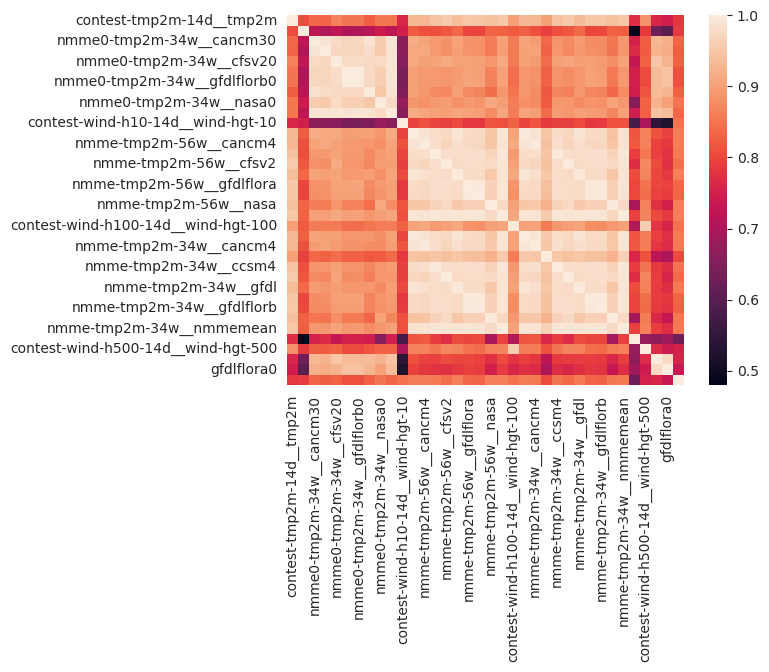

In [13]:
sns.heatmap(traindata1.corr())

In [14]:
final_train_data=train_data[[
'contest-tmp2m-14d__tmp2m',
'contest-pevpr-sfc-gauss-14d__pevpr',
'nmme0-tmp2m-34w__cancm30', 
'nmme0-tmp2m-34w__cancm40',
'nmme0-tmp2m-34w__cfsv20',
'nmme0-tmp2m-34w__gfdlflora0', 
'nmme0-tmp2m-34w__gfdlflorb0',
'nmme0-tmp2m-34w__gfdl0',
'nmme0-tmp2m-34w__nasa0', 
'nmme0-tmp2m-34w__nmme0mean', 
'contest-wind-h10-14d__wind-hgt-10', 
'nmme-tmp2m-56w__cancm3', 
'nmme-tmp2m-56w__cancm4', 
'nmme-tmp2m-56w__ccsm4',
'nmme-tmp2m-56w__cfsv2',
'nmme-tmp2m-56w__gfdl',
'nmme-tmp2m-56w__gfdlflora', 
'nmme-tmp2m-56w__gfdlflorb', 
'nmme-tmp2m-56w__nasa',
'nmme-tmp2m-56w__nmmemean',
'contest-wind-h100-14d__wind-hgt-100',
'nmme-tmp2m-34w__cancm3',
'nmme-tmp2m-34w__cancm4', 
'nmme-tmp2m-34w__ccsm3',
'nmme-tmp2m-34w__ccsm4', 
'nmme-tmp2m-34w__cfsv2', 
'nmme-tmp2m-34w__gfdl', 
'nmme-tmp2m-34w__gfdlflora',
'nmme-tmp2m-34w__gfdlflorb', 
'nmme-tmp2m-34w__nasa', 
'nmme-tmp2m-34w__nmmemean',
'contest-prwtr-eatm-14d__prwtr', 
'contest-wind-h500-14d__wind-hgt-500', 
'cfsv20', 
'gfdlflora0',
 'wind-uwnd-250-2010-1',  
]]

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5]),
 [Text(0, 0.5, 'contest-tmp2m-14d__tmp2m'),
  Text(0, 2.5, 'nmme0-tmp2m-34w__cancm30'),
  Text(0, 4.5, 'nmme0-tmp2m-34w__cfsv20'),
  Text(0, 6.5, 'nmme0-tmp2m-34w__gfdlflorb0'),
  Text(0, 8.5, 'nmme0-tmp2m-34w__nasa0'),
  Text(0, 10.5, 'contest-wind-h10-14d__wind-hgt-10'),
  Text(0, 12.5, 'nmme-tmp2m-56w__cancm4'),
  Text(0, 14.5, 'nmme-tmp2m-56w__cfsv2'),
  Text(0, 16.5, 'nmme-tmp2m-56w__gfdlflora'),
  Text(0, 18.5, 'nmme-tmp2m-56w__nasa'),
  Text(0, 20.5, 'contest-wind-h100-14d__wind-hgt-100'),
  Text(0, 22.5, 'nmme-tmp2m-34w__cancm4'),
  Text(0, 24.5, 'nmme-tmp2m-34w__ccsm4'),
  Text(0, 26.5, 'nmme-tmp2m-34w__gfdl'),
  Text(0, 28.5, 'nmme-tmp2m-34w__gfdlflorb'),
  Text(0, 30.5, 'nmme-tmp2m-34w__nmmemean'),
  Text(0, 32.5, 'contest-wind-h500-14d__wind-hgt-500'),
  Text(0, 34.5, 'gfdlflora0')])

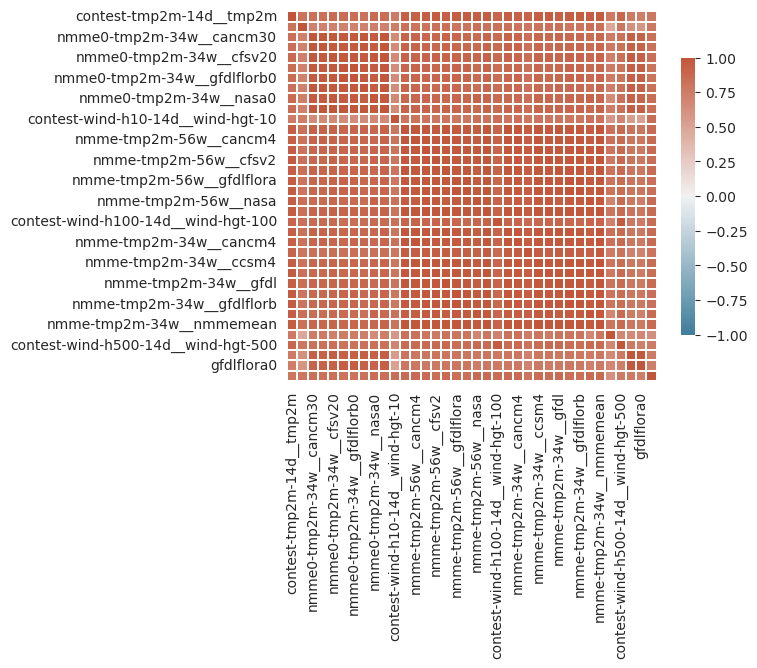

In [15]:
# Define a nice color map for our heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


sns.heatmap(
        data=final_train_data.corr(),  # our correlation matrix
        linewidths=0.3,  # the width of lines separating the matrix squares
        square=True,   # enforce 1:1 ratios among correlation cells
        cmap=cmap,  # use the color map we defined above
        vmax=1,  # define the max of our correlation scale
        vmin=-1, # define the min of our correlation scale
        center=0,  # The value at which the color map is centered about (white)
        cbar_kws={"shrink": .75}  # shrink the scale a bit
    )
# adjust y-axis ticks for legibility
plt.yticks(rotation=0)  

In [16]:
missing_val_count_by_column = (final_train_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

nmme-tmp2m-34w__ccsm3    8738
dtype: int64


In [17]:
final_train_data['nmme-tmp2m-34w__ccsm3']=final_train_data['nmme-tmp2m-34w__ccsm3'].replace(np.NaN,final_train_data['nmme-tmp2m-34w__ccsm3'].mean())

In [18]:
final_train_data.columns=final_train_data.columns.str.replace("_","").str.replace(' ', '').str.replace('-','')

In [19]:
final_train_data.columns

Index(['contesttmp2m14dtmp2m', 'contestpevprsfcgauss14dpevpr',
       'nmme0tmp2m34wcancm30', 'nmme0tmp2m34wcancm40', 'nmme0tmp2m34wcfsv20',
       'nmme0tmp2m34wgfdlflora0', 'nmme0tmp2m34wgfdlflorb0',
       'nmme0tmp2m34wgfdl0', 'nmme0tmp2m34wnasa0', 'nmme0tmp2m34wnmme0mean',
       'contestwindh1014dwindhgt10', 'nmmetmp2m56wcancm3',
       'nmmetmp2m56wcancm4', 'nmmetmp2m56wccsm4', 'nmmetmp2m56wcfsv2',
       'nmmetmp2m56wgfdl', 'nmmetmp2m56wgfdlflora', 'nmmetmp2m56wgfdlflorb',
       'nmmetmp2m56wnasa', 'nmmetmp2m56wnmmemean',
       'contestwindh10014dwindhgt100', 'nmmetmp2m34wcancm3',
       'nmmetmp2m34wcancm4', 'nmmetmp2m34wccsm3', 'nmmetmp2m34wccsm4',
       'nmmetmp2m34wcfsv2', 'nmmetmp2m34wgfdl', 'nmmetmp2m34wgfdlflora',
       'nmmetmp2m34wgfdlflorb', 'nmmetmp2m34wnasa', 'nmmetmp2m34wnmmemean',
       'contestprwtreatm14dprwtr', 'contestwindh50014dwindhgt500', 'cfsv20',
       'gfdlflora0', 'winduwnd25020101'],
      dtype='object')

In [20]:
y=final_train_data.contesttmp2m14dtmp2m

In [21]:
feature=[ 'contestpevprsfcgauss14dpevpr',
       'nmme0tmp2m34wcancm30', 'nmme0tmp2m34wcancm40', 'nmme0tmp2m34wcfsv20',
       'nmme0tmp2m34wgfdlflora0', 'nmme0tmp2m34wgfdlflorb0',
       'nmme0tmp2m34wgfdl0', 'nmme0tmp2m34wnasa0', 'nmme0tmp2m34wnmme0mean',
       'contestwindh1014dwindhgt10', 'nmmetmp2m56wcancm3',
       'nmmetmp2m56wcancm4', 'nmmetmp2m56wccsm4', 'nmmetmp2m56wcfsv2',
       'nmmetmp2m56wgfdl', 'nmmetmp2m56wgfdlflora', 'nmmetmp2m56wgfdlflorb',
       'nmmetmp2m56wnasa', 'nmmetmp2m56wnmmemean',
       'contestwindh10014dwindhgt100', 'nmmetmp2m34wcancm3',
       'nmmetmp2m34wcancm4', 'nmmetmp2m34wccsm3', 'nmmetmp2m34wccsm4',
       'nmmetmp2m34wcfsv2', 'nmmetmp2m34wgfdl', 'nmmetmp2m34wgfdlflora',
       'nmmetmp2m34wgfdlflorb', 'nmmetmp2m34wnasa', 'nmmetmp2m34wnmmemean',
       'contestprwtreatm14dprwtr', 'contestwindh50014dwindhgt500', 'cfsv20',
       'gfdlflora0', 'winduwnd25020101']

In [22]:
X = final_train_data[feature]

In [23]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [24]:
# cols_with_missing_train = [col for col in train_X.columns if train_X[col].isnull().any()]
# cols_with_missing_val = [col for col in val_X.columns if val_X[col].isnull().any()]

In [25]:
# reduced_train_X = train_X.drop(cols_with_missing_train, axis=1)
# reduced_val_X  = val_X.drop(cols_with_missing_val, axis=1)

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [27]:
first_model = DecisionTreeRegressor(random_state=1)

In [28]:
first_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [29]:
val_predictions = first_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 1


In [30]:
rf_model_on_full_data = RandomForestRegressor(random_state=1)

In [31]:
rf_model_on_full_data.fit(train_X,train_y) 

RandomForestRegressor(random_state=1)

In [32]:
test_data = pd.read_csv("/kaggle/input/widsdatathon2023/test_data.csv")

In [33]:
test_data.columns=test_data.columns.str.replace("_","").str.replace(' ', '').str.replace('-','')

In [34]:
test_X = test_data[feature]

In [35]:
# cols_with_missing_test = [col for col in test_X.columns if test_X[col].isnull().any()]

In [36]:
test_preds = rf_model_on_full_data.predict(test_X)

In [37]:
test_data.rename(columns = {'contesttmp2m14dtmp2m':'contest-tmp2m-14d__tmp2m'}, inplace = True)

In [38]:
index1=pd.Series(range(375734,407088))
index1

0        375734
1        375735
2        375736
3        375737
4        375738
          ...  
31349    407083
31350    407084
31351    407085
31352    407086
31353    407087
Length: 31354, dtype: int64

In [39]:
output = pd.DataFrame({"index":index1,'contest-tmp2m-14d__tmp2m': test_preds})
# output=output.set_index(pd.Index(range(375734,407087)))
output.to_csv("submission_B.csv", index=False)
output

,index,contest-tmp2m-14d__tmp2m
0,375734,28.060619
1,375735,28.104289
2,375736,28.112300
3,375737,28.226017
4,375738,28.303607
...,...,...
31349,407083,4.219234
31350,407084,4.029226
31351,407085,4.049039
31352,407086,3.863151
